# Analyze Stock Prices
The goal of this notebook is to analyze prices of stocks, which we will accomplish by extracting stock prices from an online source, such as Yahoo Finance or MorningStar, and analyze and visualise it.

We will try to address the following specific questions:

  * How to download/extract prices from an online source?
  * Historic change of a Stock's price over time?
  * Calculate the daily return average of a stock.
  * What was the correlation between daily returns of different stocks?
  * Use Regression/ML models to predict future stock prices.

In [1]:
#Import libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

We will first create a list of stocks that we are interested in analyzing in this study. In `stocks` variable store the stock ticker. We will set the periof of analysis using `start` and `end` variables. Then using `DataReader` we will read historic open, close, high, and low prices.

In [2]:
# Create a list of stocks to analyze
stocks = ['HASI','PEGI','CAFD','BEP','CVA']

# Lets set today's date as the time up to which the analysis has to be carried out
end = datetime.now()

# Set the historic analysis period in years (yrs = 1), and initialize the start date
yrs = 1
start = datetime(end.year-yrs,end.month,end.day) 

#Using Yahoo Finance/MorningStar to grab the stock data
for stock in stocks:
    globals()[stock] = web.DataReader(stock,'morningstar',start,end) #The globals method sets the stock name to a global variable

The advantage of using the `globals()` method ensures that each stock-ticker is stored as a variable and is available across this notebook and within any local functions. We then call `head()` and `describe()` to inspect the stock prices stored in the dataframe. The `head()` method shows the top five records in the dataframe (think about `tail()` method). The `describe()` method on the other hand shows the summary statistics of each column (high, low, open, close, volume etc.) of the dataframe.

In [3]:
HASI.tail()

Close   High    Low   Open  Volume
Symbol Date                                          
HASI   2018-03-21  18.78  18.90  18.52  18.66  220597
       2018-03-22  18.80  19.13  18.70  18.70  309696
       2018-03-23  18.83  18.97  18.78  18.83  339865
       2018-03-26  19.03  19.08  18.61  18.99  459347
       2018-03-27  19.29  19.50  18.84  19.01  442178

In [4]:
HASI.describe()

,Close,High,Low,Open,Volume
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,22.475364,22.689683,22.275178,22.486820,3.294293e+05
std,1.721835,1.709571,1.740196,1.724028,2.540625e+05
min,17.600000,17.900000,17.330000,17.590000,0.000000e+00
25%,21.760000,21.940000,21.600000,21.760000,2.035610e+05
50%,23.010000,23.130000,22.830000,23.030000,2.718030e+05
75%,23.770000,24.040000,23.510000,23.750000,3.888330e+05
max,25.220000,25.280000,24.800000,25.220000,2.858697e+06


# Historic performance of a stock

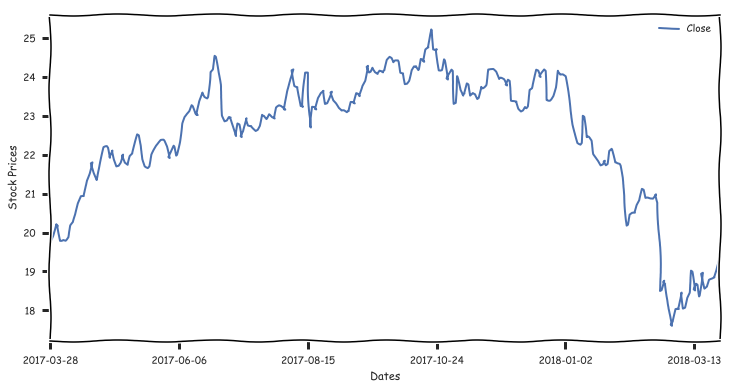

In [5]:
#Plotting the stock's closing price
plt.figure(figsize=(12,6))
plt.xkcd()
fig = HASI['Close'].plot(legend=True)
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.show()


In [6]:
mv_avg = [7,15,30,60] #days

for mv in mv_avg:
    column_nm = "MA of %s days" %(str(mv))
    HASI[column_nm] = HASI['Close'].rolling(window=mv,center=False).mean()

HASI.head()

Close   High    Low   Open  Volume  MA of 7 days  \
Symbol Date                                                           
HASI   2017-03-28  19.75  20.00  19.60  19.85  529918           NaN   
       2017-03-29  19.92  20.03  19.75  19.78  329225           NaN   
       2017-03-30  20.22  20.30  19.93  20.05  430212           NaN   
       2017-03-31  20.20  20.29  20.14  20.23  644570           NaN   
       2017-04-03  19.79  19.91  19.67  19.89  324603           NaN   

                   MA of 15 days  MA of 30 days  MA of 60 days  
Symbol Date                                                     
HASI   2017-03-28            NaN            NaN            NaN  
       2017-03-29            NaN            NaN            NaN  
       2017-03-30            NaN            NaN            NaN  
       2017-03-31            NaN            NaN            NaN  
       2017-04-03            NaN            NaN            NaN

In [7]:
HASI.tail()

Close   High    Low   Open  Volume  MA of 7 days  \
Symbol Date                                                           
HASI   2018-03-21  18.78  18.90  18.52  18.66  220597     18.638571   
       2018-03-22  18.80  19.13  18.70  18.70  309696     18.680000   
       2018-03-23  18.83  18.97  18.78  18.83  339865     18.701429   
       2018-03-26  19.03  19.08  18.61  18.99  459347     18.797143   
       2018-03-27  19.29  19.50  18.84  19.01  442178     18.842857   

                   MA of 15 days  MA of 30 days  MA of 60 days  
Symbol Date                                                     
HASI   2018-03-21      18.436000      19.220000      20.731500  
       2018-03-22      18.509333      19.163333      20.642167  
       2018-03-23      18.562667      19.101000      20.555000  
       2018-03-26      18.630000      19.041333      20.471167  
       2018-03-27      18.685333      18.980333      20.392500

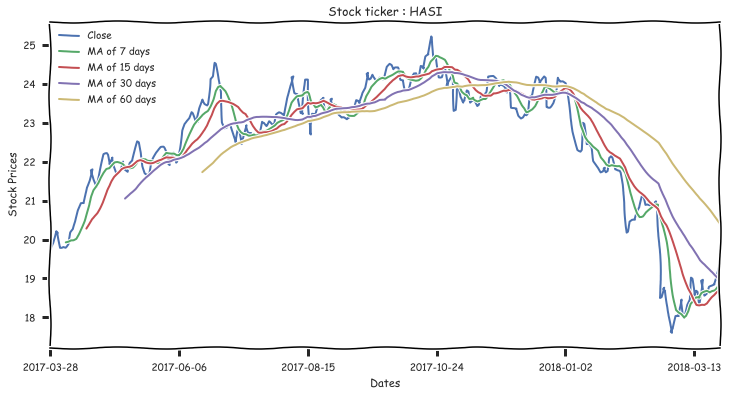

In [8]:
#plt.figure()
#plt.xkcd()
fig = HASI[['Close','MA of 7 days','MA of 15 days','MA of 30 days','MA of 60 days']].plot(subplots=False,figsize=(12,6))
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.title('Stock ticker : HASI')
plt.show()

# Historic Stock returns

In [9]:
HASI['Pct Return'] = HASI['Close'].pct_change() # Calculates daily percentage return
HASI['Pct Return'].tail()

Symbol  Date      
HASI    2018-03-21    0.009135
        2018-03-22    0.001065
        2018-03-23    0.001596
        2018-03-26    0.010621
        2018-03-27    0.013663
Name: Pct Return, dtype: float64

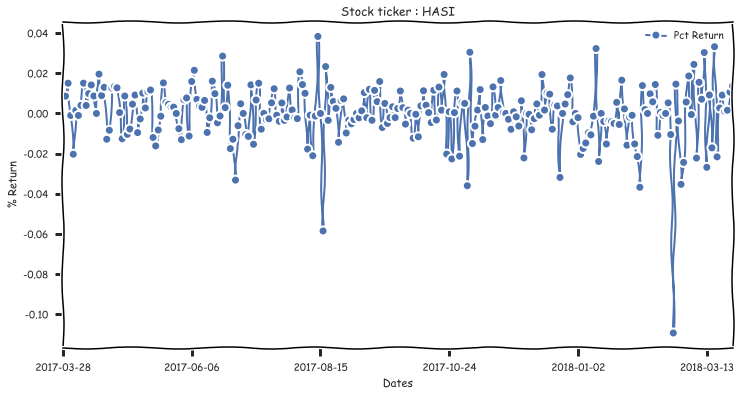

In [10]:
fig = HASI[['Pct Return']].plot(subplots=False,figsize=(12,6),marker='o')
labels = [item.get_text()[7:17] for item in fig.get_xticklabels()]
fig.set_xticklabels(labels)
plt.xlabel('Dates')
plt.ylabel('% Return')
plt.title('Stock ticker : HASI')
plt.show()

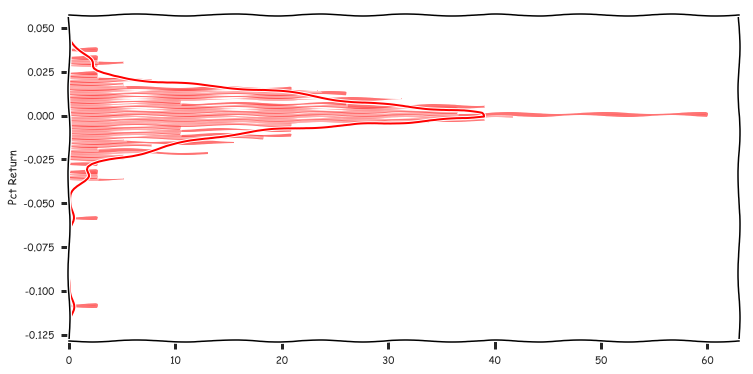

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(HASI['Pct Return'].dropna(),bins=100,color='red',vertical=True)


In [12]:
stocks
# Calculates daily percentage return of other stocks
PEGI['Pct Return'] = PEGI['Close'].pct_change()
CAFD['Pct Return'] = CAFD['Close'].pct_change()
BEP['Pct Return'] = BEP['Close'].pct_change()
CVA['Pct Return'] = CVA['Close'].pct_change()

In [14]:
PEGI.describe()


,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02,260.000000
mean,22.311360,22.547897,22.108686,22.336437,8.597961e+05,-0.000356
std,2.205178,2.182015,2.199869,2.192346,5.107890e+05,0.013979
min,16.950000,17.190000,16.580000,17.000000,0.000000e+00,-0.082391
25%,21.290000,21.490000,21.050000,21.260000,5.594860e+05,-0.005869
50%,22.130000,22.310000,21.920000,22.120000,7.466350e+05,0.000417
75%,24.150000,24.390000,23.950000,24.150000,1.052882e+06,0.008923
max,26.320000,26.560000,26.200000,26.350000,4.950741e+06,0.029079


In [15]:
CAFD.describe()

,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02,260.000000
mean,14.030996,14.157875,13.876251,14.022414,2.360592e+05,-0.000471
std,1.157245,1.157831,1.131608,1.149370,2.579342e+05,0.015137
min,11.700000,11.770000,11.510000,11.760000,0.000000e+00,-0.114967
25%,13.190000,13.390000,13.055000,13.250000,1.092260e+05,-0.006314
50%,14.420000,14.570000,14.290000,14.420000,1.686960e+05,0.000000
75%,14.950000,15.080000,14.750000,14.950000,2.717650e+05,0.007546
max,15.900000,15.920000,15.525000,15.690000,2.395320e+06,0.038244


In [16]:
BEP.describe()

,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,261.000000,260.000000
mean,32.804748,33.023901,32.580269,32.829042,75211.486590,0.000232
std,1.527504,1.544866,1.522236,1.533976,42686.676542,0.010026
min,29.320000,29.582900,29.080000,29.160000,0.000000,-0.035422
25%,31.750000,31.920000,31.500000,31.870000,49283.000000,-0.004801
50%,33.150000,33.400000,32.932000,33.130000,66324.000000,0.000576
75%,33.950000,34.090000,33.660000,33.920000,92601.000000,0.005590
max,35.820000,36.000000,35.496400,35.850000,261187.000000,0.042998


In [17]:
CVA.describe()

,Close,High,Low,Open,Volume,Pct Return
count,261.000000,261.000000,261.000000,261.000000,2.610000e+02,260.000000
mean,14.974138,15.154368,14.806989,14.987356,1.050599e+06,-0.000003
std,0.962734,0.968681,0.952762,0.965308,8.147854e+05,0.016820
min,13.200000,13.300000,13.000000,13.100000,0.000000e+00,-0.085443
25%,14.350000,14.550000,14.200000,14.350000,7.158840e+05,-0.008863
50%,14.950000,15.100000,14.750000,14.950000,9.303760e+05,0.000000
75%,15.450000,15.600000,15.300000,15.450000,1.188443e+06,0.006740
max,17.200000,17.300000,17.150000,17.250000,1.130619e+07,0.096667


In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.describe()

In [ ]:
sns.jointplot(tips['total_bill'],tips['tip'],kind='scatter')